In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy
from tabulate import tabulate

from features import PreprocessData
from linear_regression import linear_closed_form, linear_gradient_descent

In [2]:
# Initialize PPD
ppd = PreprocessData()

# Split dataset
train, validation, test = ppd.preprocess_data(ppd.data)

# Compute most common words from 
ppd.compute_most_common_words(train)

## Task 3: Experiments
### 1 - Compare runtime, stability and performance of closed-form and gradient descent

In [3]:
# Compute features on training set
start = time.time()
X_train, y_train = ppd.compute_features(train, simple=True)
feat_train_runtime = time.time() - start
print(X_train.shape)

# Compute features on validation set
start = time.time()
X_valid, y_valid = ppd.compute_features(validation, simple=True)
feat_valid_runtime = time.time() - start
print(X_valid.shape)

print(f'Training features runtime: {feat_train_runtime}')
print(f'Validation features runtime: {feat_valid_runtime}')

(10000, 4)
(1000, 4)
Training features runtime: 0.014734745025634766
Validation features runtime: 0.0016970634460449219


In [4]:
def test_closed_vs_gradient(X_train, y_train, X_valid, y_valid, hyperparams, rand_init=False):
    # Train using closed form method
    start = time.time()
    w_closed = linear_closed_form(X_train, y_train)
    w_closed_runtime = time.time() - start
    
    # Train using gradient descent
    # Hyperparameters
    w_init = np.random.rand(X_train.shape[1]) if rand_init else np.zeros(X_train.shape[1])
    decay_speed = hyperparams['decay_speed']
    learn_rate = hyperparams['learn_rate']
    min_err = hyperparams['min_err']
    max_iter = hyperparams['max_iter']

    start = time.time()
    w_grad = linear_gradient_descent(X_train, y_train, w_init, decay_speed, learn_rate, min_err, max_iter, verbose=True)
    w_grad_runtime = time.time() - start
    
    # Compute MSE on training set
    y_closed_train = np.matmul(X_train, w_closed)
    mse_closed_train = np.sum((y_closed_train - y_train)**2)/len(y_train)

    y_grad_train = np.matmul(X_train, w_grad)
    mse_grad_train = np.sum((y_grad_train - y_train)**2)/len(y_train)
    
    # Compute MSE on validation set
    y_closed_valid = np.matmul(X_valid, w_closed)
    mse_closed_valid = np.sum((y_closed_valid - y_valid)**2)/len(y_valid)

    y_grad_valid = np.matmul(X_valid, w_grad)
    mse_grad_valid = np.sum((y_grad_valid - y_valid)**2)/len(y_valid)
    
    return {'train': {'closed': mse_closed_train, 'grad': mse_grad_train}, 'validation': {'closed': mse_closed_valid, 'grad': mse_grad_valid}, 'runtime': {'closed': w_closed_runtime, 'grad': w_grad_runtime}}

#### 1.1 - Testing random w0 vs. zero w0

In [9]:
hyperparams = {'decay_speed': 10**(-12), 'learn_rate': 10**(-6), 'min_err': 10**(-7), 'max_iter': 1000000}
rand_runtime = []
zero_runtime = []
closed_runtime = []
for _ in range(20):
    perf_rand = test_closed_vs_gradient(X_train, y_train, X_valid, y_valid, hyperparams, rand_init=True)
    perf_zero = test_closed_vs_gradient(X_train, y_train, X_valid, y_valid, hyperparams, rand_init=False)
    rand_runtime.append(perf_rand['runtime']['grad'])
    zero_runtime.append(perf_zero['runtime']['grad'])
    closed_runtime.append(perf_rand['runtime']['closed'])

Error: 0.008399417747629045 | Learning rate: 9.999999999989998e-07
Error: 3.9112363860916306e-05 | Learning rate: 9.99999989999e-07
Error: 3.891320541724275e-06 | Learning rate: 9.999999799990004e-07
Error: 3.8715061965104804e-07 | Learning rate: 9.99999969999001e-07
Finished after 35866 iterations
Error: 0.02747409762411553 | Learning rate: 9.999999999989998e-07
Error: 2.5240488827598966e-05 | Learning rate: 9.99999989999e-07
Error: 2.5111965363145244e-06 | Learning rate: 9.999999799990004e-07
Error: 2.4984096906422007e-07 | Learning rate: 9.99999969999001e-07
Finished after 33968 iterations
Error: 0.012204837079564946 | Learning rate: 9.999999999989998e-07
Error: 4.476479937860773e-05 | Learning rate: 9.99999989999e-07
Error: 4.453685898173232e-06 | Learning rate: 9.999999799990004e-07
Error: 4.4310080275875416e-07 | Learning rate: 9.99999969999001e-07
Finished after 36451 iterations
Error: 0.02747409762411553 | Learning rate: 9.999999999989998e-07
Error: 2.5240488827598966e-05 | Lea

Error: 2.4984096906422007e-07 | Learning rate: 9.99999969999001e-07
Finished after 33968 iterations
Error: 0.016622846689306785 | Learning rate: 9.999999999989998e-07
Error: 4.0892193396326495e-05 | Learning rate: 9.99999989999e-07
Error: 4.068397213866837e-06 | Learning rate: 9.999999799990004e-07
Error: 4.0476812058538865e-07 | Learning rate: 9.99999969999001e-07
Finished after 36059 iterations
Error: 0.02747409762411553 | Learning rate: 9.999999999989998e-07
Error: 2.5240488827598966e-05 | Learning rate: 9.99999989999e-07
Error: 2.5111965363145244e-06 | Learning rate: 9.999999799990004e-07
Error: 2.4984096906422007e-07 | Learning rate: 9.99999969999001e-07
Finished after 33968 iterations
Error: 0.01275999819634257 | Learning rate: 9.999999999989998e-07
Error: 3.498141992097964e-05 | Learning rate: 9.99999989999e-07
Error: 3.4803296062895383e-06 | Learning rate: 9.999999799990004e-07
Error: 3.462607999640073e-07 | Learning rate: 9.99999969999001e-07
Finished after 35383 iterations
Er

In [10]:
print(f'Average runtime with random init: {sum(rand_runtime)/len(rand_runtime)}')
print(f'Average runtime with zero init: {sum(zero_runtime)/len(zero_runtime)}')
print(f'Average runtime with closed form: {sum(closed_runtime)/len(closed_runtime)}')

print('Closed-form Training MSE: ' + str(perf_rand['train']['closed']))
print(f'Gradient descent Training MSE: ' + str(perf_rand['train']['grad']))

print(f'Closed-form Validation MSE: ' + str(perf_rand['validation']['closed']))
print(f'Gradient descent Validation MSE: ' + str(perf_rand['validation']['grad']))

Average runtime with random init: 0.4442092180252075
Average runtime with zero init: 0.4232942581176758
Average runtime with closed form: 0.0019019603729248046
Closed-form Training MSE: 1.0846830709157251
Gradient descent Training MSE: 1.0846830730810026
Closed-form Validation MSE: 1.0203266848431447
Gradient descent Validation MSE: 1.0203284850569836


#### 1.2 - Testing different hyperparameters

In [11]:
learn_rates = [10**(-5), 10**(-6), 10**(-7), 10**(-8), 10**(-9), 10**(-10)]
decay_speeds = [10**(-5), 10**(-6), 10**(-7), 10**(-8), 10**(-9), 10**(-10)]
min_error = 10**(-7)

train_grad_errors = []
valid_grad_errors = []
grad_runtimes = []
for learn_rate in learn_rates:
    train_err = []
    valid_err = []
    run = []
    for decay_speed in decay_speeds:
        print(f'Testing with learn_rate: {learn_rate} and decay_speed: {decay_speed}')
        hyperparams = {'decay_speed': decay_speed, 'learn_rate': learn_rate, 'min_err': min_error, 'max_iter': 10000000}
        perf = test_closed_vs_gradient(X_train, y_train, X_valid, y_valid, hyperparams)
        train_err.append(perf['train']['grad'])
        valid_err.append(perf['validation']['grad'])
        run.append(perf['runtime']['grad'])
    train_grad_errors.append(train_err)
    valid_grad_errors.append(valid_err)
    grad_runtimes.append(run)

Testing with learn_rate: 1e-05 and decay_speed: 1e-05
Error: 0.2747382288591415 | Learning rate: 9.99990000099999e-06
Finished after 4469 iterations
Testing with learn_rate: 1e-05 and decay_speed: 1e-06
Error: 0.27474070150072866 | Learning rate: 9.999990000010002e-06
Finished after 4398 iterations
Testing with learn_rate: 1e-05 and decay_speed: 1e-07
Error: 0.27474094876733524 | Learning rate: 9.9999990000001e-06
Finished after 4391 iterations
Testing with learn_rate: 1e-05 and decay_speed: 1e-08
Error: 0.2747409734940204 | Learning rate: 9.999999900000003e-06
Finished after 4391 iterations
Testing with learn_rate: 1e-05 and decay_speed: 1e-09
Error: 0.2747409759666891 | Learning rate: 9.99999999e-06
Finished after 4391 iterations
Testing with learn_rate: 1e-05 and decay_speed: 1e-10
Error: 0.274740976213956 | Learning rate: 9.999999999e-06
Finished after 4391 iterations
Testing with learn_rate: 1e-06 and decay_speed: 1e-05
Error: 0.02747382288591415 | Learning rate: 9.99990000099999e

Error: 2.0603788007121167e-06 | Learning rate: 9.999000089992e-09
Error: 1.5989456681876927e-06 | Learning rate: 9.998000389924015e-09
Error: 1.2694011044495228e-06 | Learning rate: 9.997000889736079e-09
Error: 1.00781369540853e-06 | Learning rate: 9.99600158936825e-09
Error: 8.001504629570275e-07 | Learning rate: 9.995002488760618e-09
Error: 6.352915537350452e-07 | Learning rate: 9.994003587853284e-09
Error: 5.044109607614196e-07 | Learning rate: 9.993004886586385e-09
Error: 4.0050317224566204e-07 | Learning rate: 9.992006384900074e-09
Error: 3.180075382693134e-07 | Learning rate: 9.991008082734531e-09
Error: 2.5251017144842116e-07 | Learning rate: 9.990009980029961e-09
Error: 2.0050737163661978e-07 | Learning rate: 9.98901207672659e-09
Error: 1.5921787179769127e-07 | Learning rate: 9.988014372764669e-09
Error: 1.2643382779808523e-07 | Learning rate: 9.987016868084474e-09
Error: 1.0040255352013498e-07 | Learning rate: 9.986019562626305e-09
Finished after 1401743 iterations
Testing wit

Error: 1.2452839526340522e-07 | Learning rate: 9.70873776981808e-10
Error: 1.2165291694273957e-07 | Learning rate: 9.699320953449845e-10
Error: 1.1884652821552367e-07 | Learning rate: 9.689922386725559e-10
Error: 1.161075042443898e-07 | Learning rate: 9.680542016645286e-10
Error: 1.1343416509604045e-07 | Learning rate: 9.671179790414122e-10
Error: 1.1082487410964419e-07 | Learning rate: 9.661835655441202e-10
Error: 1.0827803721719754e-07 | Learning rate: 9.652509559338712e-10
Error: 1.0579210156296934e-07 | Learning rate: 9.64320144992091e-10
Error: 1.0336555391600787e-07 | Learning rate: 9.633911275203168e-10
Error: 1.0099692060662744e-07 | Learning rate: 9.624638983400973e-10
Finished after 3942822 iterations
Testing with learn_rate: 1e-09 and decay_speed: 1e-09
Error: 2.747409759666891e-05 | Learning rate: 9.99999999e-10
Error: 1.8523289060166724e-06 | Learning rate: 9.999000089992e-10
Error: 1.0435884487079811e-06 | Learning rate: 9.998000389924015e-10
Error: 7.200441406639282e-07 

Finished after 1288686 iterations
Testing with learn_rate: 1e-10 and decay_speed: 1e-07
Error: 2.7474094876733518e-06 | Learning rate: 9.999999000000099e-11
Error: 1.8211505593506928e-06 | Learning rate: 9.900989118713948e-11
Error: 1.229376985802034e-06 | Learning rate: 9.803920607458764e-11
Error: 8.500723615463424e-07 | Learning rate: 9.708736921481852e-11
Error: 6.061404682063771e-07 | Learning rate: 9.615383690828491e-11
Error: 4.4853608169306035e-07 | Learning rate: 9.523808616780131e-11
Error: 3.4586842653545354e-07 | Learning rate: 9.433961374154588e-11
Error: 2.780108614957982e-07 | Learning rate: 9.345793519084719e-11
Error: 2.3213696366090305e-07 | Learning rate: 9.25925840192052e-11
Error: 2.0017681539726152e-07 | Learning rate: 9.17431108492559e-11
Error: 1.771186777883467e-07 | Learning rate: 9.090908264462886e-11
Error: 1.59867082708276e-07 | Learning rate: 9.00900819738665e-11
Error: 1.4649865763109753e-07 | Learning rate: 8.928570631377623e-11
Error: 1.3579847500527986

In [12]:
data = deepcopy(train_grad_errors)
for err, learn_rate in zip(data, learn_rates):
    err.insert(0, learn_rate)
table = tabulate(data, headers=['Learn rate/decay speed'] + decay_speeds)
print('MSE for gradient descent on training set:\n')
print(table)

MSE for gradient descent on training set:

  Learn rate/decay speed    1e-05    1e-06    1e-07    1e-08    1e-09    1e-10
------------------------  -------  -------  -------  -------  -------  -------
                   1e-05  1.08468  1.08468  1.08468  1.08468  1.08468  1.08468
                   1e-06  1.08468  1.08468  1.08468  1.08468  1.08468  1.08468
                   1e-07  1.08469  1.08468  1.08468  1.08468  1.08468  1.08468
                   1e-08  1.08883  1.08484  1.08471  1.08471  1.0847   1.0847
                   1e-09  1.10789  1.09433  1.08849  1.08702  1.08687  1.08685
                   1e-10  1.31064  1.13619  1.1141   1.10975  1.10927  1.10922


In [13]:
data = deepcopy(valid_grad_errors)
for err, learn_rate in zip(data, learn_rates):
    err.insert(0, learn_rate)
table = tabulate(data, headers=['Learn rate/decay speed'] + decay_speeds)
print('MSE for gradient descent on validation set:\n')
print(table)

MSE for gradient descent on validation set:

  Learn rate/decay speed    1e-05    1e-06    1e-07    1e-08    1e-09    1e-10
------------------------  -------  -------  -------  -------  -------  -------
                   1e-05  1.02033  1.02033  1.02033  1.02033  1.02033  1.02033
                   1e-06  1.02033  1.02033  1.02033  1.02033  1.02033  1.02033
                   1e-07  1.02043  1.02035  1.02035  1.02034  1.02034  1.02034
                   1e-08  1.02567  1.02091  1.02055  1.02052  1.02052  1.02052
                   1e-09  1.04722  1.03106  1.02533  1.02381  1.02364  1.02362
                   1e-10  1.25706  1.07942  1.0544   1.04938  1.04882  1.04876


In [15]:
data = deepcopy(grad_runtimes)
for runtime, learn_rate in zip(data, learn_rates):
    runtime.insert(0, learn_rate)
table = tabulate(data, headers=['Learn rate/decay speed'] + decay_speeds)
print('Runtime(s) for gradient descent:\n')
print(table)

Runtime(s) for gradient descent:

  Learn rate/decay speed      1e-05       1e-06       1e-07       1e-08       1e-09       1e-10
------------------------  ---------  ----------  ----------  ----------  ----------  ----------
                   1e-05   0.116059   0.0703435   0.0984132   0.0703449   0.0693622   0.0745676
                   1e-06   0.479676   0.383047    0.451919    0.475055    0.384151    0.396765
                   1e-07   4.29145    2.61122     2.65114     2.64536     2.28122     2.40449
                   1e-08  12.8545    16.5609     13.7615     13.3415     13.4917     15.1541
                   1e-09   9.24393   14.7336     33.6424     40.2988     40.3629     40.6455
                   1e-10   9.75323   13.606      18.1443     20.3933     21.5642     20.6675


### 2 - Compare models using no text, top 60 words and top 160 words features using closed-form

#### 2.1 - No text features

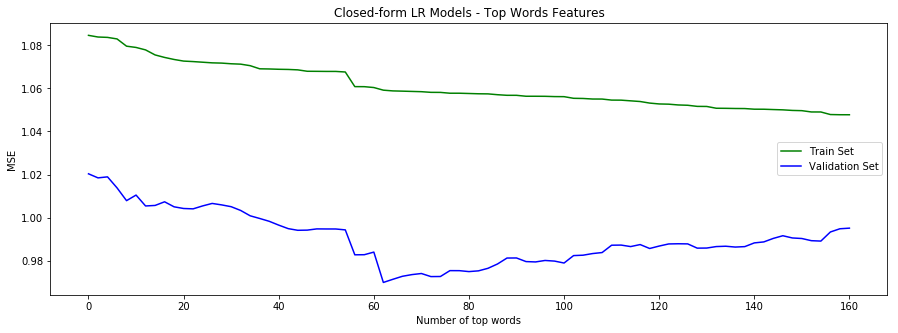

Train set MSE
Top words 0: 1.0846830709157251
Top words 60: 1.060429141685383
Top words 160: 1.0477763217987115
Validation set MSE
Top words 0: 1.0846830709157251
Top words 60: 1.060429141685383
Top words 160: 1.0477763217987115


In [20]:
mse_train = []
mse_valid = []

step = 2
num_features = list(range(0, 161, step))

for i in num_features:
    X_train_i, y_train_i = ppd.compute_features(train, extra_features=False, num_word_features=i)
    X_valid_i, y_valid_i = ppd.compute_features(validation, extra_features=False, num_word_features=i)
    w_i = linear_closed_form(X_train_i, y_train_i)

    # Compute MSE on train set
    y_train_i = np.matmul(X_train_i, w_i)
    mse_train_i = np.sum((y_train_i - y_train)**2)/len(y_train)

    # Compute MSE on validation set
    y_valid_i = np.matmul(X_valid_i, w_i)
    mse_valid_i = np.sum((y_valid_i - y_valid)**2)/len(y_valid)

    mse_train.append(mse_train_i)
    mse_valid.append(mse_valid_i)

plt.figure(figsize=(15,5))
plt.plot(num_features, mse_train, 'g-', label='Train Set')
plt.plot(num_features, mse_valid, 'b-', label='Validation Set')
plt.legend(loc='center right')
plt.title('Closed-form LR Models - Top Words Features')
plt.xlabel('Number of top words'), plt.ylabel('MSE')
plt.show()

print('Train set MSE')
print(f'Top words 0: {mse_train[0]}')
print(f'Top words 60: {mse_train[60//step]}')
print(f'Top words 160: {mse_train[160//step]}')

print('Validation set MSE')
print(f'Top words 0: {mse_train[0]}')
print(f'Top words 60: {mse_train[60//step]}')
print(f'Top words 160: {mse_train[160//step]}')

### 3 - Demonstrate performance of new features

In [21]:
# Compute most common words from
ppd.compute_most_common_words(train)

In [22]:
# Baseline - no extra features
# Compute features on training set
start = time.time()
X_train, y_train = ppd.compute_features(train, extra_features=False, num_word_features=60)
feat_train_runtime = time.time() - start
print(X_train.shape)

# Compute features on validation set
start = time.time()
X_valid, y_valid = ppd.compute_features(validation, extra_features=False, num_word_features=60)
feat_valid_runtime = time.time() - start
print(X_valid.shape)

print(f'Training features runtime: {feat_train_runtime}')
print(f'Validation features runtime: {feat_valid_runtime}')

(10000, 64)
(1000, 64)
Training features runtime: 0.2501492500305176
Validation features runtime: 0.022776365280151367


In [23]:
# Gradient descent
w_init = np.zeros(X_train.shape[1])
# w_grad = linear_gradient_descent(X_train, y_train, w_init, decay_speed=10**(-10), learn_rate=10**(-8), min_err=10**(-7), max_iter=10000000, verbose=True)
w_grad = linear_closed_form(X_train, y_train)

# Compute MSE on validation set
y_grad_valid = np.matmul(X_valid, w_grad)
mse_grad_valid = np.sum((y_grad_valid - y_valid)**2)/len(y_valid)
print(mse_grad_valid)

0.983939729721766


In [24]:
# Extra features
# Compute features on training set
start = time.time()
X_train_extra, y_train_extra = ppd.compute_features(train, extra_features=True, num_word_features=60)
feat_train_runtime = time.time() - start
print(X_train_extra.shape)

# Compute features on validation set
start = time.time()
X_valid_extra, y_valid_extra = ppd.compute_features(validation, extra_features=True, num_word_features=60)
feat_valid_runtime = time.time() - start
print(X_valid_extra.shape)

print(f'Training features runtime: {feat_train_runtime}')
print(f'Validation features runtime: {feat_valid_runtime}')

(10000, 70)
(1000, 70)
Training features runtime: 0.8176195621490479
Validation features runtime: 0.0820925235748291


In [25]:
# Gradient descent
w_init_extra = np.zeros(X_train_extra.shape[1])
# w_grad_extra = linear_gradient_descent(X_train_extra, y_train_extra, w_init_extra, decay_speed=10**(-10), learn_rate=10**(-8), min_err=10**(-7), max_iter=10000000, verbose=True)
w_grad_extra = linear_closed_form(X_train_extra, y_train_extra)

# Compute MSE on validation set
y_grad_valid_extra = np.matmul(X_valid_extra, w_grad_extra)
mse_grad_valid_extra = np.sum((y_grad_valid_extra - y_valid_extra)**2)/len(y_valid_extra)
print(mse_grad_valid_extra)

0.9817493486951205


In [26]:
print(mse_grad_valid - mse_grad_valid_extra)

0.0021903810266454826
